# **Importing Necessary Libraries**

In [3]:
#pip install keras

In [4]:
#pip install tensorflow

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_curve, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# **Importing the Dataset**

In [6]:
df = pd.read_csv("/content/gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# **Problem Statement**

* predicting turbine energy yield (TEY) using ambient variables as features.


# **Dataset Description :**

* The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
* The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

> **Attribute Information:**

* The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
1. Ambient temperature (AT) C â€“6.23 37.10 17.71
2. Ambient pressure (AP) mbar 985.85 1036.56 1013.07
3. Ambient humidity (AH) (%) 24.08 100.20 77.87
4. Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
5. Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
6. Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
7. Turbine after temperature (TAT) C 511.04 550.61 546.16
8. Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
9. Turbine energy yield (TEY) MWH 100.02 179.50 133.51
10. Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
11. Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# **Exploratory Data Analysis**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [9]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
df.agg(["skew","kurt"])

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skew,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurt,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [11]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

AT 
 20.1350    5
25.9690    5
14.0430    5
20.1690    5
20.7200    5
          ..
17.7090    1
17.2890    1
17.1100    1
17.2850    1
6.9279     1
Name: AT, Length: 12086, dtype: int64
AP 
 1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
996.30       1
998.02       1
998.48       1
998.88       1
1029.80      1
Name: AP, Length: 540, dtype: int64
AH 
 100.140    31
100.150    29
100.110    28
100.120    24
100.130    19
           ..
57.187      1
60.104      1
62.370      1
67.608      1
97.533      1
Name: AH, Length: 12637, dtype: int64
AFDP 
 4.5032    7
4.4361    6
3.8837    6
4.4273    6
4.2500    6
         ..
4.5599    1
4.6085    1
4.5880    1
4.5110    1
3.4770    1
Name: AFDP, Length: 11314, dtype: int64
GTEP 
 25.487    9
25.552    9
24.308    9
24.288    9
24.361    9
         ..
25.686    1
22.525    1
25.485    1
20.980    1
19.164    1
Name: GTEP, Length: 8234, dtype: int64
TIT 
 1100.0    761
1099.9    598
1100.1    592
1100.2

In [12]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

AT 
 [6.8594 6.785  6.8977 ... 7.2647 7.006  6.9279]
AP 
 [1007.9  1008.4  1008.8  1009.2  1009.7  1010.7  1011.6  1012.7  1013.8
 1015.   1016.   1016.1  1016.2  1016.6  1017.1  1017.9  1018.8  1019.8
 1020.6  1021.2  1021.7  1022.2  1022.4  1022.8  1023.8  1024.   1024.2
 1024.3  1023.7  1022.3  1022.6  1022.7  1022.   1021.5  1021.3  1021.8
 1021.9  1022.9  1023.   1021.1  1020.9  1021.   1020.4  1019.6  1018.5
 1017.6  1016.9  1016.4  1016.5  1015.7  1015.3  1014.8  1014.3  1013.9
 1013.6  1013.3  1013.1  1012.6  1011.7  1010.5  1009.1  1008.   1007.3
 1006.8  1006.4  1005.6  1004.6  1003.9  1002.9  1002.3  1001.2  1000.2
  999.49  998.76  998.01  996.84  996.28  995.76  995.4   995.    994.37
  993.51  992.42  991.73  991.01  990.28  989.67  988.97  988.63  988.2
  988.11  987.84  988.21  988.87  988.65  989.32  990.22  990.87  993.55
  994.75  995.92  996.96  997.65  997.88  998.17  999.05  999.57 1000.8
 1001.3  1001.8  1002.5  1002.7  1002.8  1003.   1006.5  1006.3  1006.2
 100

In [13]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 0 categorical variables

The categorical variables are :
 []


There are 11 Numeric variables

The Numeric variables are :
 ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']


## **Visualization**

Skew: -0.030710466602760514
Kurtosis: -0.987597300486351


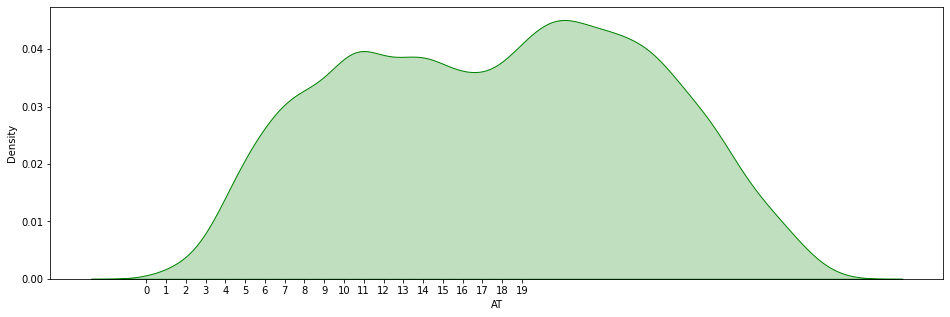

Skew: 0.10760069249939162
Kurtosis: 0.42406965727691404


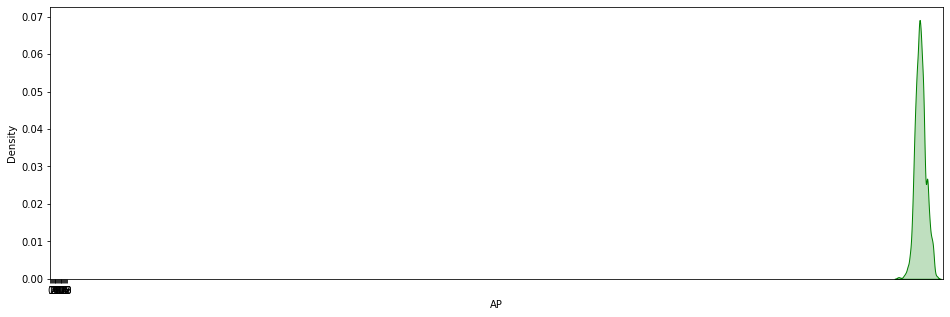

Skew: -0.6812239660014958
Kurtosis: -0.2824761061238146


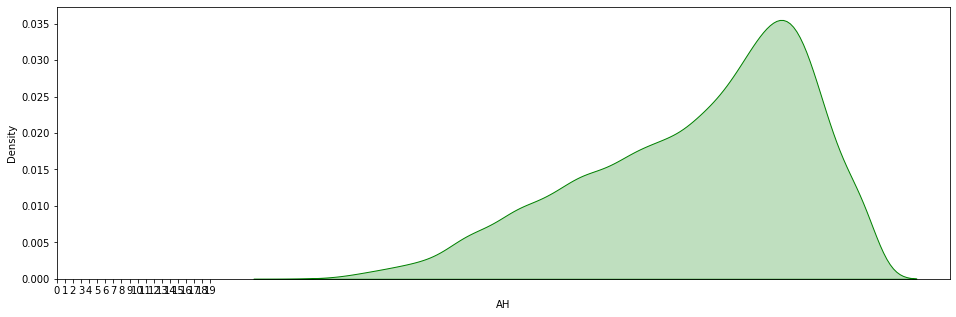

Skew: 0.31515004542338865
Kurtosis: 0.2816415511670072


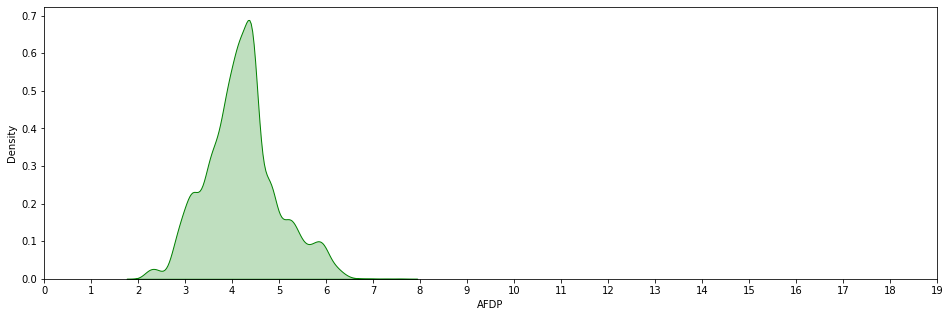

Skew: 0.37098698430816335
Kurtosis: -0.618358220526035


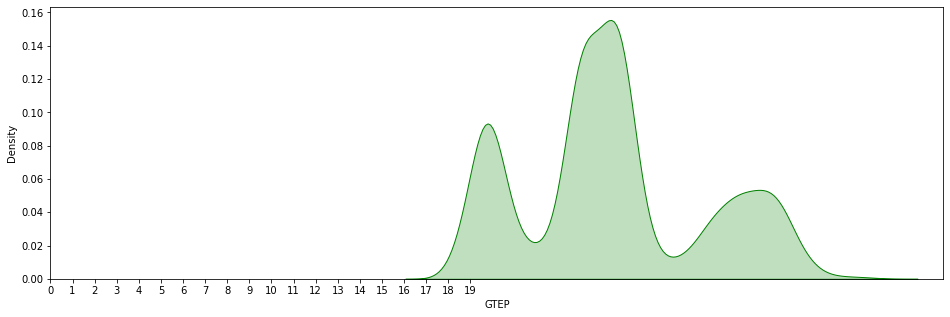

Skew: -1.1337442476380986
Kurtosis: 0.3752315999888327


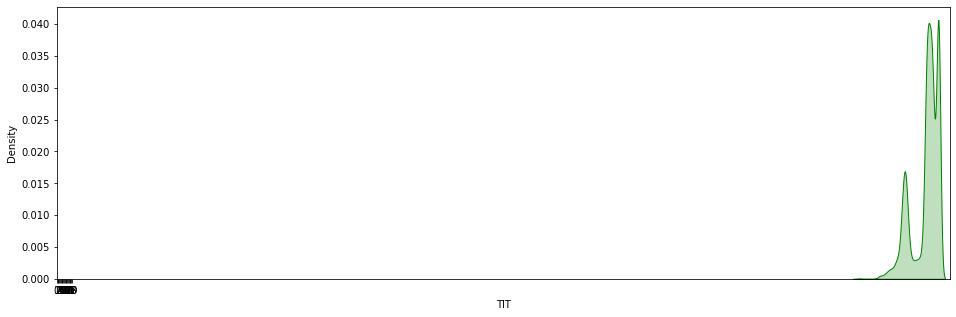

Skew: -1.4855239468667698
Kurtosis: 0.8476367171778421


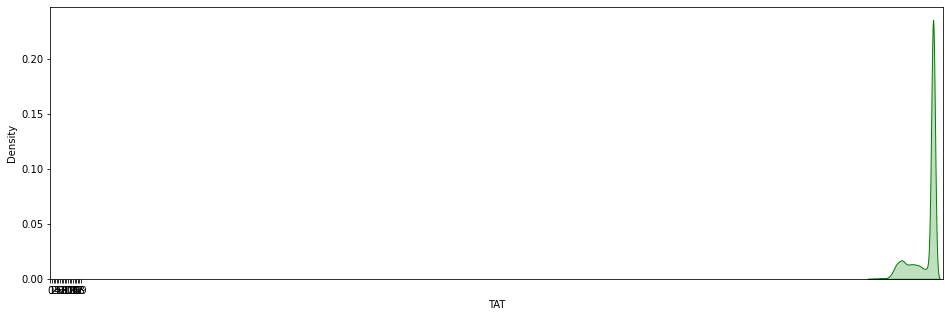

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


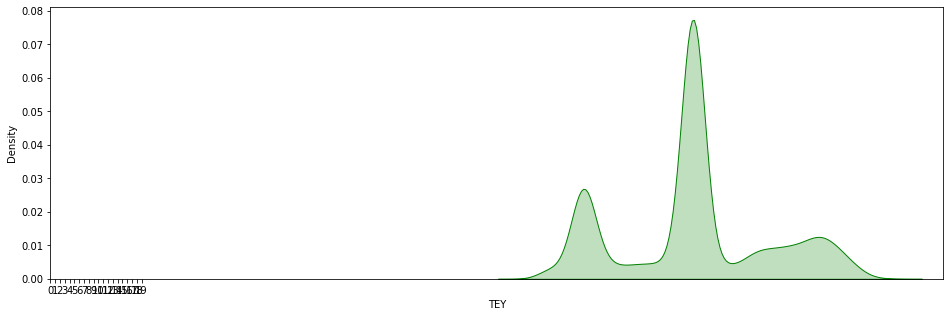

Skew: 0.2630421062978831
Kurtosis: -0.5894200177451441


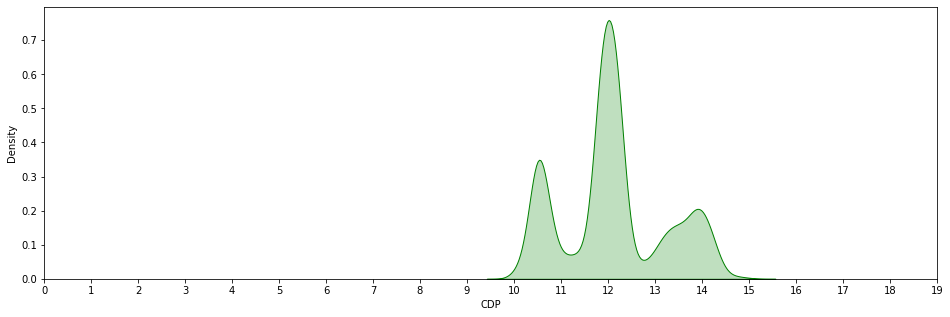

Skew: 6.534576564650062
Kurtosis: 82.51811559335607


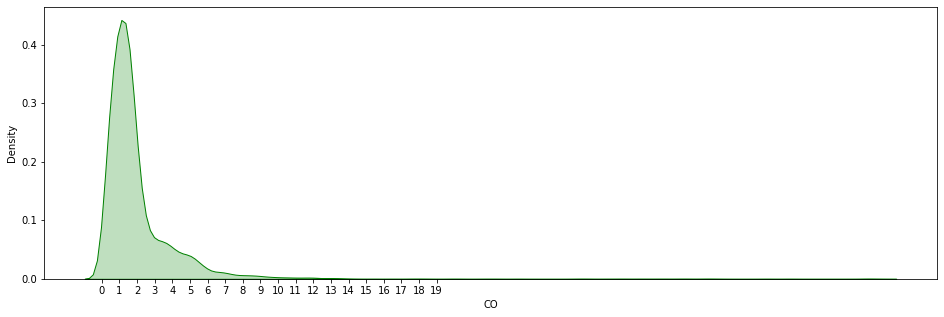

Skew: 1.1266052505347077
Kurtosis: 2.6603806135785466


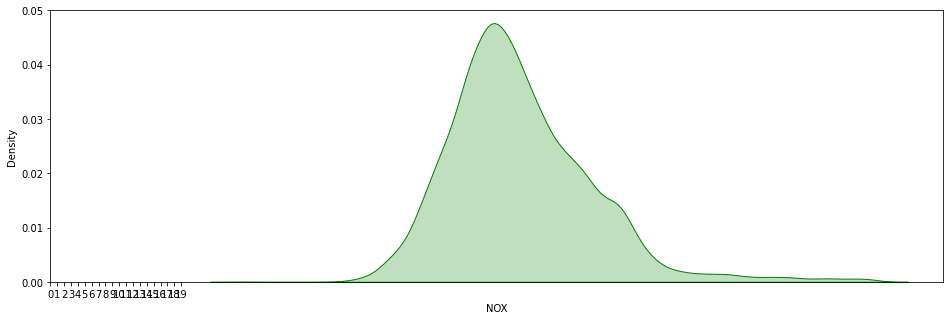

In [14]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


<Figure size 432x288 with 0 Axes>

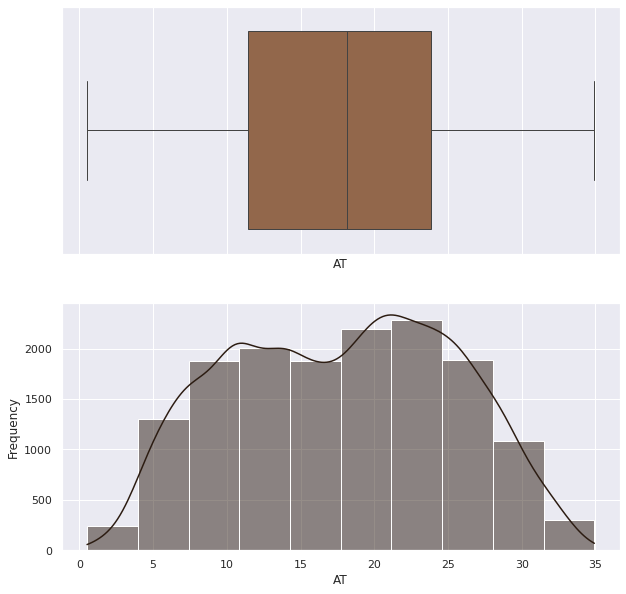

<Figure size 720x720 with 0 Axes>

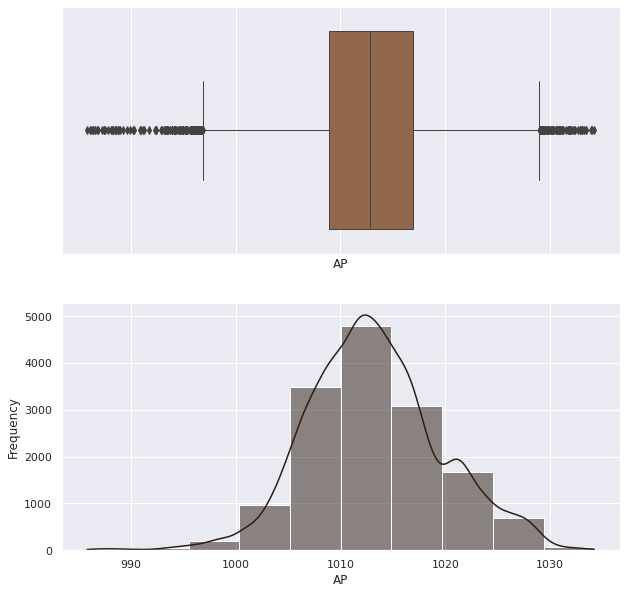

<Figure size 720x720 with 0 Axes>

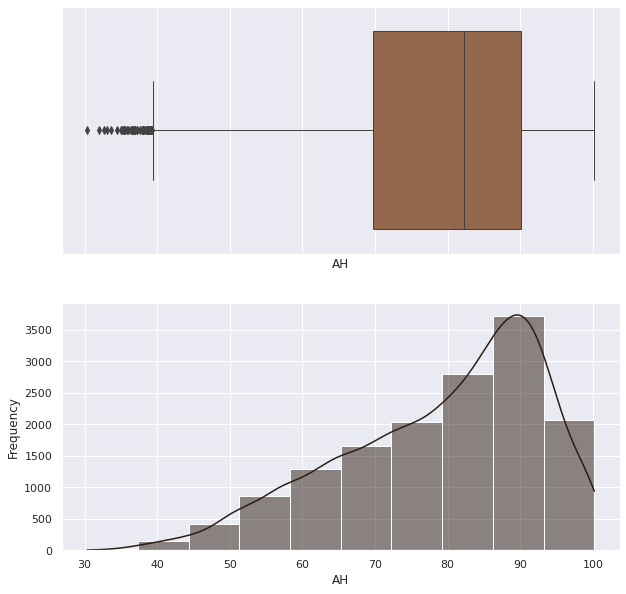

<Figure size 720x720 with 0 Axes>

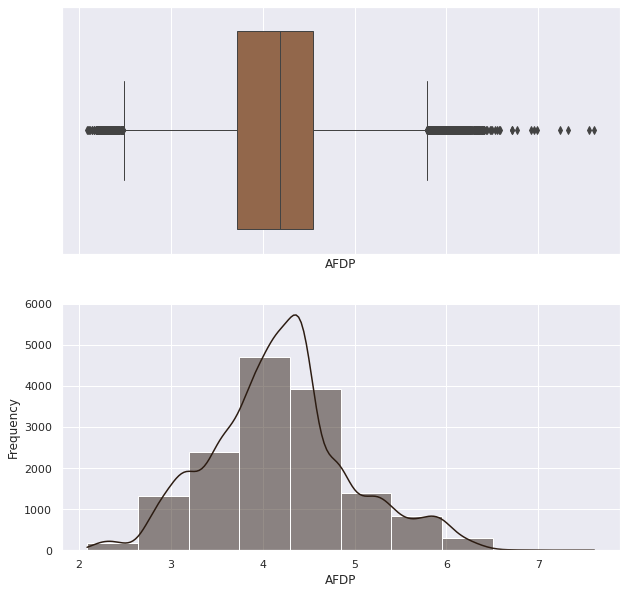

<Figure size 720x720 with 0 Axes>

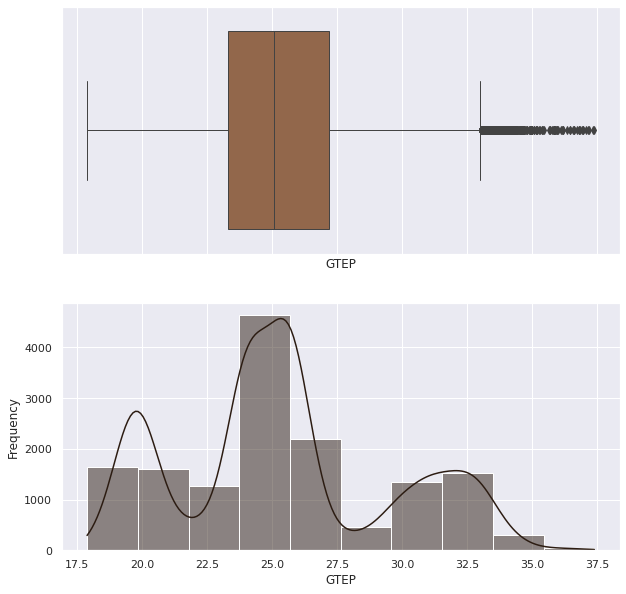

<Figure size 720x720 with 0 Axes>

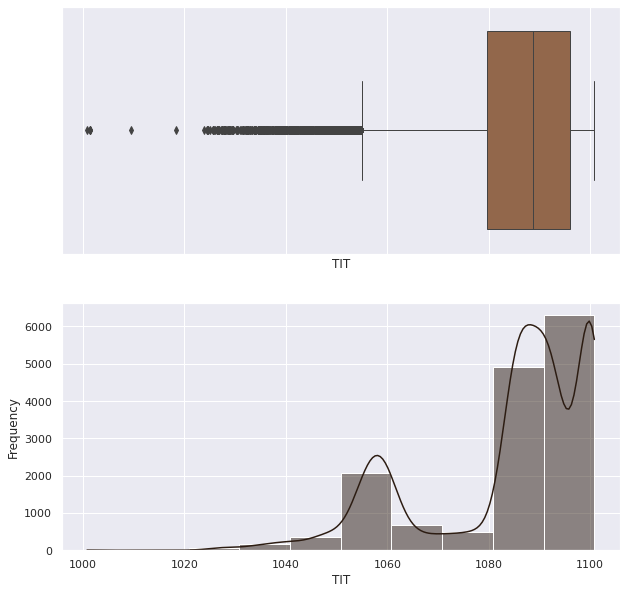

<Figure size 720x720 with 0 Axes>

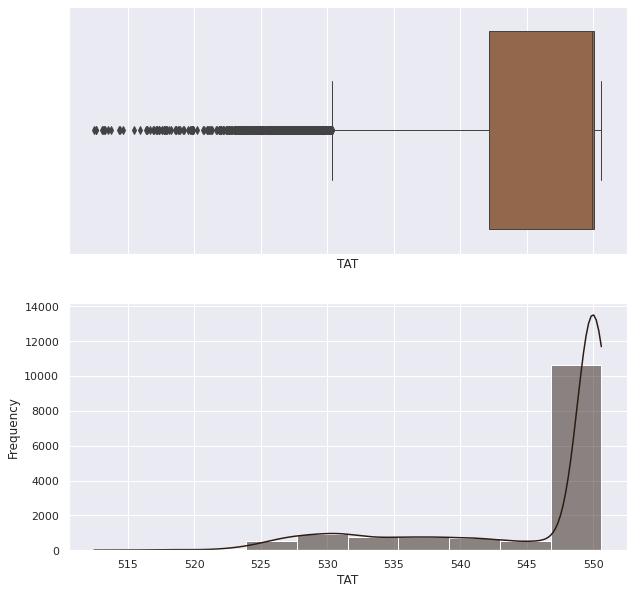

<Figure size 720x720 with 0 Axes>

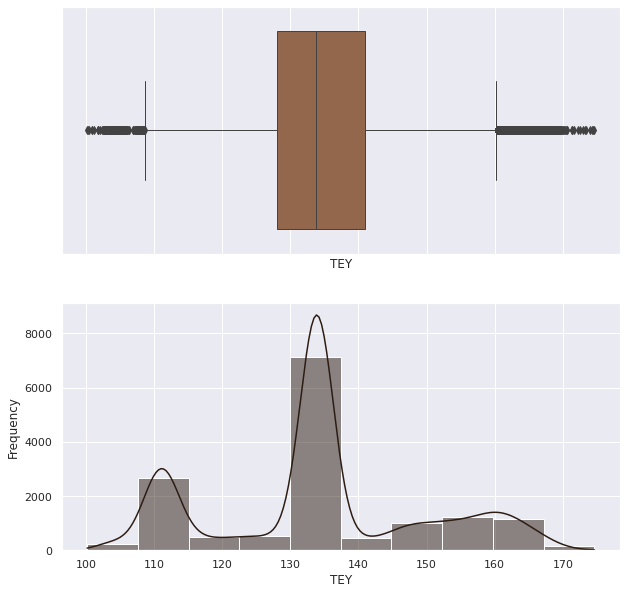

<Figure size 720x720 with 0 Axes>

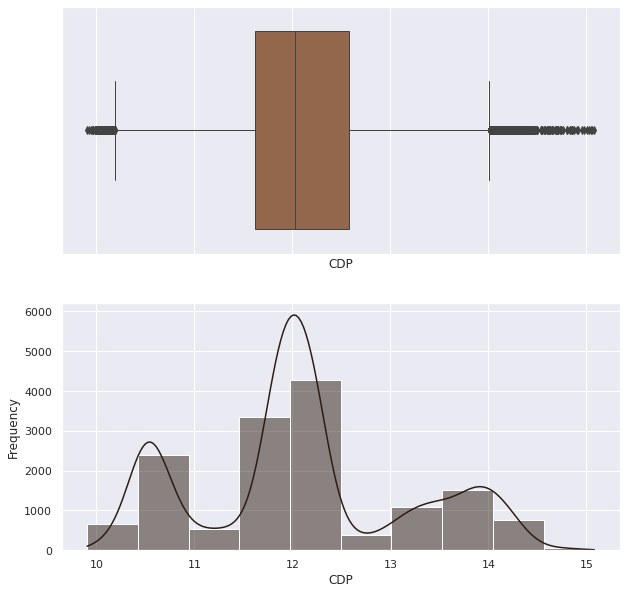

<Figure size 720x720 with 0 Axes>

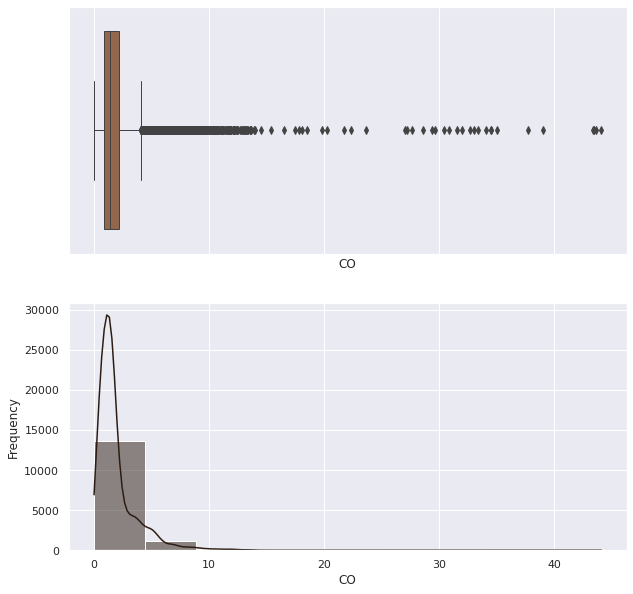

<Figure size 720x720 with 0 Axes>

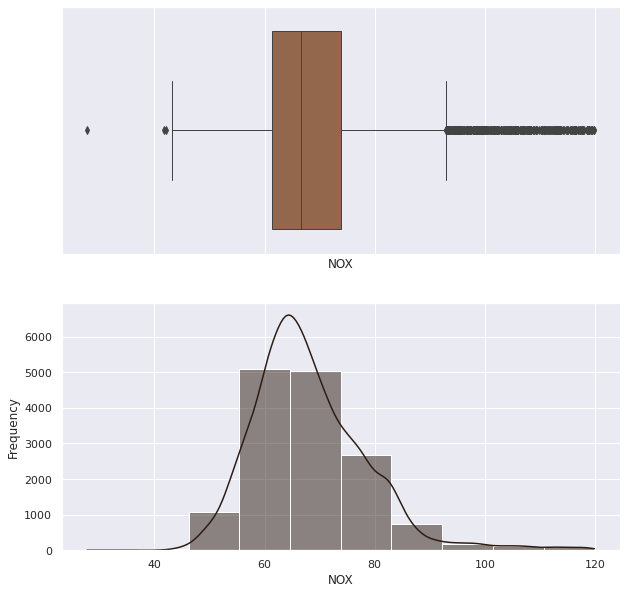

In [15]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="copper")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="copper")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="copper")

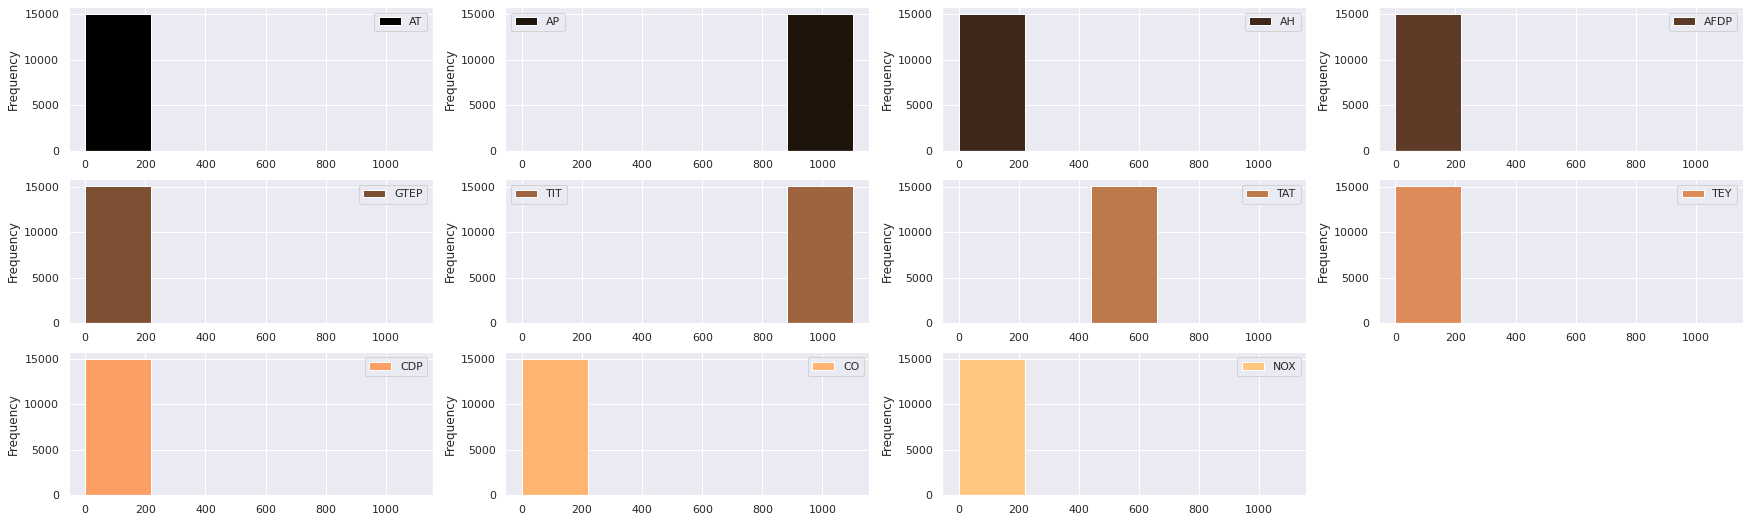

In [16]:
plt.rcParams['figure.figsize']=(30,28)
df.plot(kind='hist', bins=5, subplots=True,  cmap="copper",layout=(9,4), sharex=False, sharey=False)
plt.show()

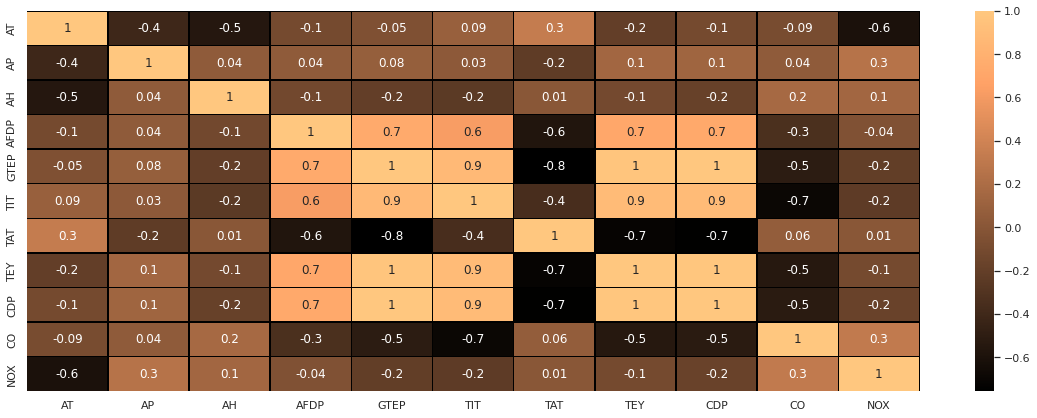

In [17]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="copper", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

# **Neural Network**

In [18]:
# # dictionary of months mapping to seasons
# season_dict = {'dec' : 'winter', 'jan' : 'winter', 'feb' : 'winter',
#               'mar' : 'spring', 'apr' : 'spring', 'may' : 'spring',
#               'jun' : 'summer', 'jul' : 'summer', 'aug' : 'summer', 'sep' : 'summer',
#               'oct' : 'autumn', 'nov' : 'autumn'}

# # applying dictionary
# df = df.replace({'month' : season_dict})

# # renaming column
# df = df.rename(columns = {'month' : 'season'})

# # visualizing data
# sns.countplot(df['season'])
# plt.title('Count plot of seasons')

## **Scalling Data**

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [21]:
scaled_data=pd.DataFrame(scaler.fit_transform(df),columns=df.columns, index=df.index)
scaled_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [22]:
x = scaled_data.drop('TEY',axis=1)
y = scaled_data['TEY']
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [23]:
y

0        0.195191
1        0.195459
2        0.195325
3        0.195459
4        0.195459
           ...   
15034    0.153681
15035    0.155965
15036    0.134605
15037    0.141994
15038    0.153278
Name: TEY, Length: 15039, dtype: float64

## **Splitting Data into Training and Testing**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10527, 10)
(4512, 10)
(10527,)
(4512,)


In [26]:
y_test.value_counts()

0.450967    49
0.450027    49
0.451505    47
0.451236    41
0.451102    40
            ..
0.506448     1
0.812735     1
0.381650     1
0.467356     1
0.754299     1
Name: TEY, Length: 2056, dtype: int64

## **Model Building**

In [27]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

* This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.
* We have our first layer as a dense layer with 16 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.
* Our second layer is also a dense layer with 12 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.
* Our third layer is a dense layer with 1 neuron, sigmoid activation.

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


## **Model fitting**

In [30]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 27, epochs = 100, verbose=0)
# epochs=100 ; which means the data will be passed in the neural network for 100 times.
# batch_size = 11 ; which means that everytime the data will be passed in the batches of 11 data points.

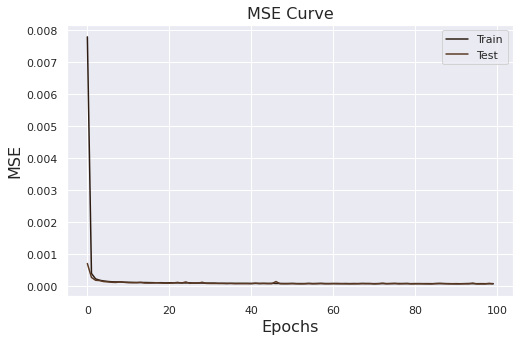

In [31]:
# Visualizing the training and testing loss at epochs=100
plt.figure(figsize=[8,5])
plt.plot(history.history['mse'], label='Train')
plt.plot(history.history['val_mse'], label='Test')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE Curve', fontsize=16)
plt.show()

In [32]:
# making predictions
y_pred = model.predict(x_test)

141/141 [==============================] - 0s 1ms/step


# **Model Evaluation**

In [33]:
print("Training loss : ",model.evaluate(x_train, y_train,verbose=0)[0])
print("Testing loss : ",model.evaluate(x_test, y_test,verbose=0)[0])

Training loss :  7.758488936815411e-05
Testing loss :  7.6174626883585e-05


In [34]:
print("MSE : ",mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("Adj R2 : ", 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1))

MSE :  7.617462245795743e-05
R2 :  0.9983271964255287
Adj R2 :  0.9983260833009782


# **Visualization**

* Visualizing the actual v/s predicted values for all data points

<function matplotlib.pyplot.show(*args, **kw)>

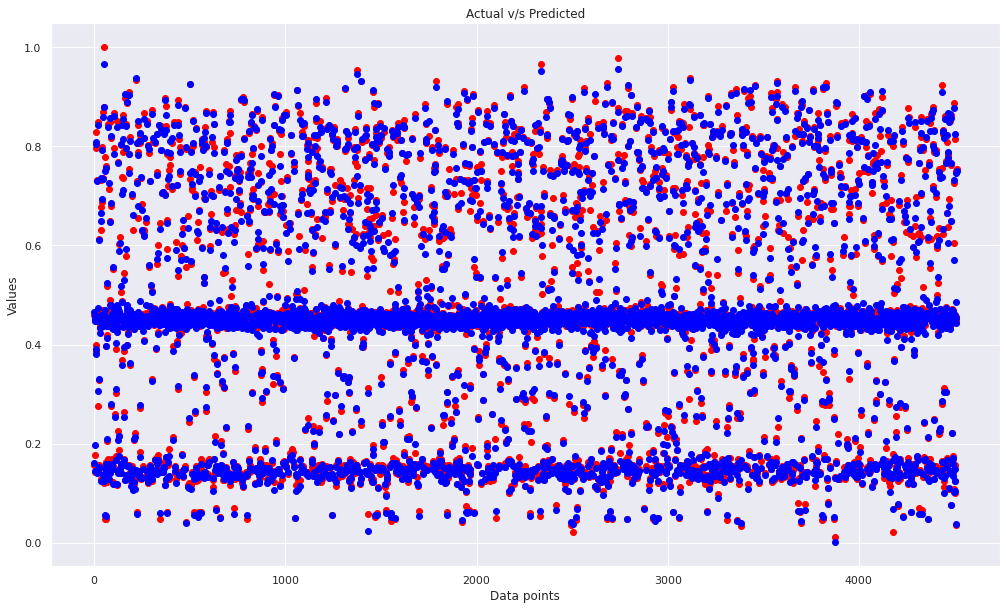

In [35]:
plt.figure(figsize=(17,10))
plt.scatter(range(len(y_test)), y_test, color="red", label="actual")
plt.scatter(range(len(y_pred)), y_pred, color="blue", label="predicted")
plt.xlabel("Data points")
plt.ylabel("Values")
plt.title("Actual v/s Predicted")
plt.show

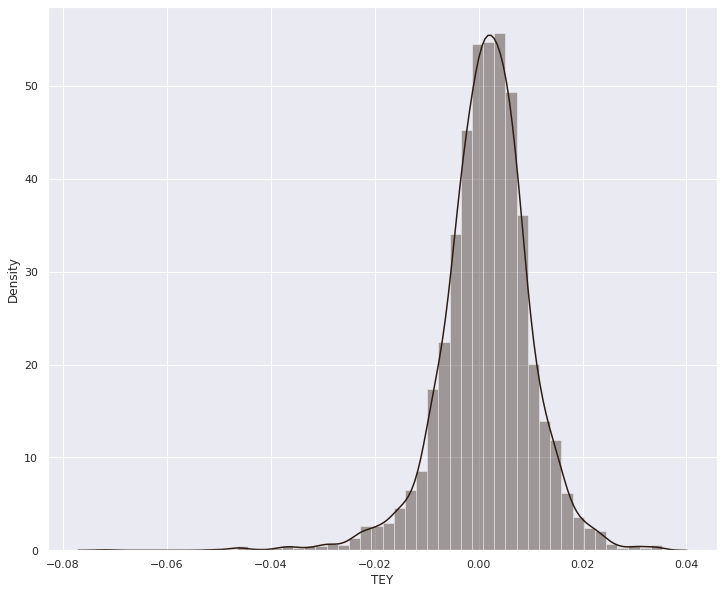

In [37]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-np.ravel(y_pred),bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

# **Grid Search**

In [38]:
from keras.layers import Dropout
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [39]:
# Defining the model

def create_model(activation_function,init,learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init,learning_rate = learning_rate, dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 100)
grid_result = grid.fit(x_train,y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 1/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.000 total time=   4.1s
[CV 2/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 2/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 3/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 3/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 4/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 4/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.000 total ti

In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00038000238710083066, using {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'normal', 'learning_rate': 0.001}
0.0,0.0 with: {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'uniform', 'learning_rate': 0.001}
9.496675920672715e-05,0.0001899335184134543 with: {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'uniform', 'learning_rate': 0.01}
0.0002850356278941035,0.000570071255788207 with: {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'uniform', 'learning_rate': 0.1}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'normal', 'learning_rate': 0.001}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'normal', 'learning_rate': 0.01}
0.0002850356278941035,0.000570071255788207 with: {'activation_function': 'softmax', 'dropout_rate': 0.0, 'init': 'normal', 'learning_rate': 0.1}
9.49667592067271

In [41]:
model = grid_result.best_estimator_.model

In [42]:
# # Save the Model
# model.save("best-model.h5")

In [43]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [44]:
model.summary()

Model: "sequential_541"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1623 (Dense)          (None, 8)                 88        
                                                                 
 dropout_1080 (Dropout)      (None, 8)                 0         
                                                                 
 dense_1624 (Dense)          (None, 4)                 36        
                                                                 
 dropout_1081 (Dropout)      (None, 4)                 0         
                                                                 
 dense_1625 (Dense)          (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 27, epochs = 100, verbose=0)
# epochs=100 ; which means the data will be passed in the neural network for 100 times.
# batch_size = 11 ; which means that everytime the data will be passed in the batches of 11 data points.

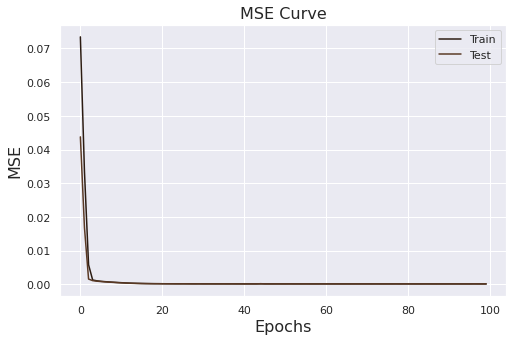

In [46]:
# Visualizing the training and testing loss at epochs=100
plt.figure(figsize=[8,5])
plt.plot(history.history['mse'], label='Train')
plt.plot(history.history['val_mse'], label='Test')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE Curve', fontsize=16)
plt.show()

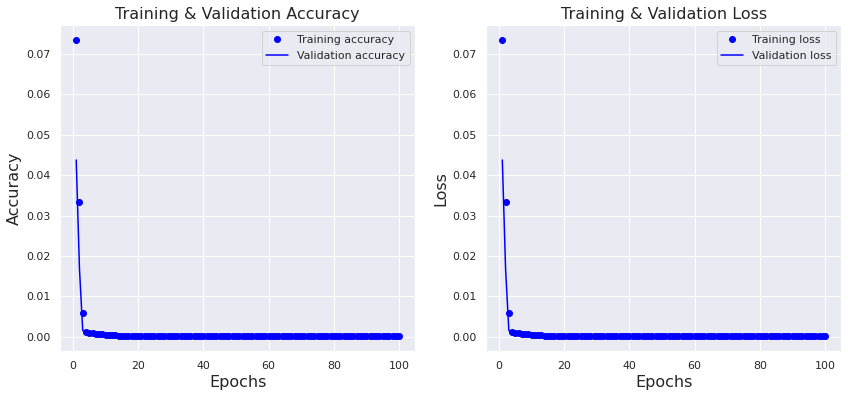

In [47]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mse']
val_accuracy = history_dict['val_mse']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [48]:
# making predictions
y_pred = model.predict(x_test)

141/141 [==============================] - 0s 1ms/step


In [49]:
print("Training loss : ",model.evaluate(x_train, y_train,verbose=0)[0])
print("Testing loss : ",model.evaluate(x_test, y_test,verbose=0)[0])

Training loss :  9.32767943595536e-05
Testing loss :  9.071314707398415e-05


In [50]:
print("MSE : ",mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("Adj R2 : ", 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1))

MSE :  9.07131524882158e-05
R2 :  0.9980079286140526
Adj R2 :  0.9980066030408653


# **Visualization**

* Visualizing the actual v/s predicted values for all data points

<function matplotlib.pyplot.show(*args, **kw)>

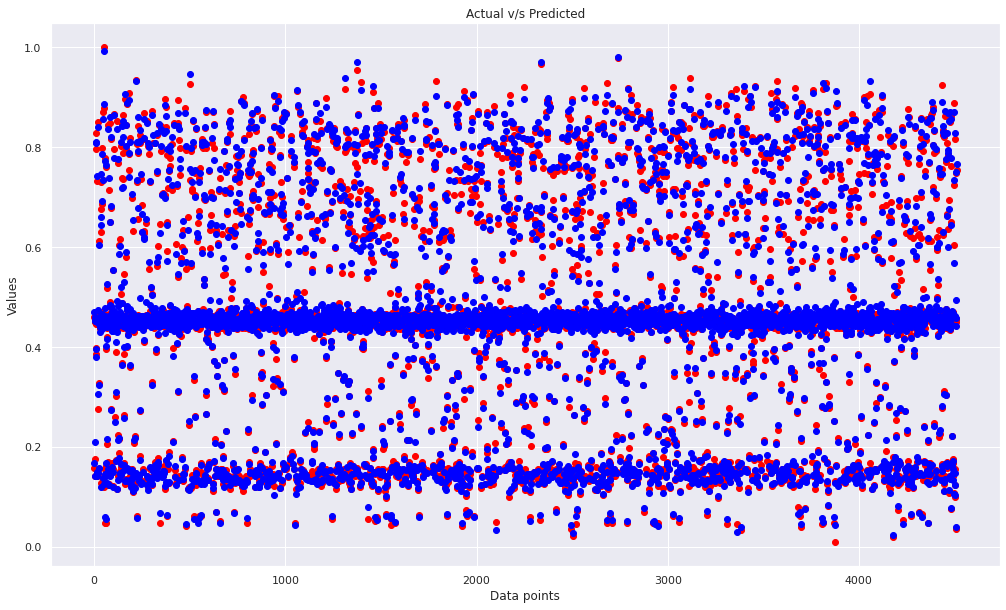

In [51]:
plt.figure(figsize=(17,10))
plt.scatter(range(len(y_test)), y_test, color="red", label="actual")
plt.scatter(range(len(y_pred)), y_pred, color="blue", label="predicted")
plt.xlabel("Data points")
plt.ylabel("Values")
plt.title("Actual v/s Predicted")
plt.show

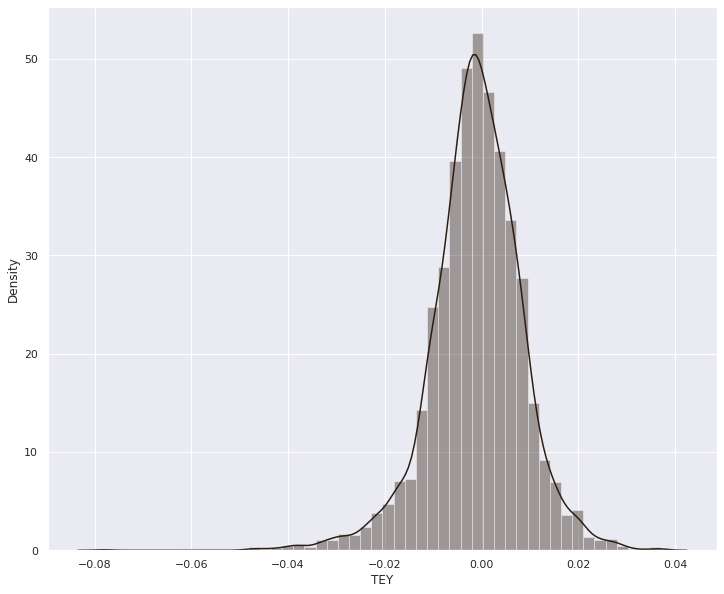

In [52]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-np.ravel(y_pred),bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data